###  Linear Regression - Exercises
---

In this exercise, we start by creating example data sampling from a known linear function and adding some random noise (to account for natural noise present in almost every real-world dataset).

This data will be used to fit a linear regression model according to the closed form solution presented in the lecture. We will analyze how well the true parameters can be estimated depending on the number of data samples and finally visualize the results using matplotlib.

#### Setup

Execute the following two code cells to import required packages and to declare the function for visualization of the results later on.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# setting seed for reproducibility
np.random.seed(42)

In [3]:
def visualize_results(x1_train, y_train, w_pred, w_true):

    x1 = np.linspace(0, 1, 1000).reshape(-1, 1)
    x0 = np.ones(shape=x1.shape)
    x = np.concatenate([x0, x1], axis=1)
    
    y_true = np.matmul(x, w_true)
    y_pred = np.matmul(x, w_pred)
    fig, axes = plt.subplots(1, 1, figsize=(6, 6))

    axes.plot(x1, y_true, label='True Function')
    axes.plot(x1, y_pred, label='Predicted Function', color='seagreen', linestyle='--')
    axes.scatter(x1_train, y_train, label='Train Samples', color='seagreen')

    axes.set_xlabel(r'$x_1$', fontsize=14)
    axes.set_ylabel(r'$y$', fontsize=14)
    plt.legend(fontsize=14)

### Linear Regression

#### Input sample creation

Assume we are creating a set of data samples given the true function $y = w_1*x_1+w_0*x_0$. The second part of the function represents a constant and is therefore set to 

$$
x_0=1.
$$

Each data sample is given as 

$$
(x_1, 1).
$$

In a first step, we create one array containing randomized $x_1$​-values for each sample, and another array containing the $x_0 = 1$ values for the samples.
Concatenating both arrays yields the input matrix ```x_train```​.

In [6]:
# number of input sampels
n_samples = 10

### YOUR SOLUTION HERE
# sampling random x_1 values in the range (0, 1) into a numpy array of shape (n_samples, 1)
# creating the constants x_0 of the same shape as x_1
# creating input matrix x_train by combining x0_train and x1_train into a matrix of shape (n_samples, 2)

x1_train  = np.random.uniform(0, 1, size=(n_samples, 1))
x0_train = np.ones(shape=(n_samples, 1))
x_train = np.concatenate([x0_train, x1_train], axis=1)

### END OF SOLUTION

assert x_train.shape == (n_samples, 2), f"Your input matrix has the wrong shape {x_train.shape}, it should be {(n_samples, 2)}"

In the next step we compute the corresponding $y$ values by multiplying the input matrix ```x_train``` with the true parameters $[w_0, w_1]$.

Choose $w_0 = 2.0$ and $w_1 = 1.5$ and create a ```numpy``` array ```w_true``` of shape ```(2, 1)``` containing these parameters.
Use ```numpy's``` function ```matmul()``` to compute ```y_train``` from ```x_train``` and ```w_true```.
``y_train`` should be of shape (n_samples, 1).

As 'real' training data is usually subject to noise we want to add some noise to our training data ```y_train```. Therefore, sample noise values from a normal distribution using ```numpy's``` function ```np.random.normal()```. Set the mean $\mu = 0$ and the standard deviation $\sigma$ to an arbitrary value (e.g. $0.15$). Set the ```size``` parameter to make sure that the returned array is of the same size as ```y_train```.

Finally we add the noise to ```y_train``` to obtain our final training data.

In [13]:
### YOUR SOLUTION HERE
# creating parameter vector w
# creating output matrix y
w_true = np.array([2.0,1.5])
w_true  = w_true.reshape(2,1)

y_train = np.matmul(x_train, w_true)

y_train += np.random.normal(0,0.15, size  = y_train.shape)

### END OF SOLUTION

assert w_true.shape == (2, 1), f"Your parameter vector has the wrong shape {w_true.shape}, it should be {(2, 1)}"
assert y_train.shape == (n_samples, 1), f"Your output matrix has the wrong shape {y_train.shape}, it should be {(n_samples, 1)}"

#### Closed form solution

Assuming the true underlying function parameters are unknown use the closed form solution $ \mathbf{w}_{\text{pred}} = (\mathbf{X}_{\text{train}}^{\top} \mathbf{X}_{\text{train}})^{-1} \mathbf{X}_{\text{train}}^{\top} \mathbf{y}_{\text{train}}$ to compute the parameter estimates ```w_pred```.

Make use  of the ```numpy``` functions ```np.linalg.inv()``` (matrix inversion) and ```np.transpose()```. Matrix multiplication can be implemented using ``np.matmul()`` or the ```@``` operator. 

Compare the parameters estimated by linear regression to the true parameter values set above.

Try to vary the number of training samples used for the prediction (in the code cells above) and see how the accuracies of the results vary. 
(Remember to execute all the relevant code cells once again after varying the parameter!)

In [14]:
### YOUR SOLUTION HERE
x_train_trans = np.transpose(x_train)
inversed_Xt = np.matmul(np.linalg.inv(np.matmul(x_train_trans, x_train)), x_train_trans)

w_pred = np.matmul(inversed_Xt, y_train)
### END OF SOLUTION

We can now use the visualization function defined at the top to visualize the results.

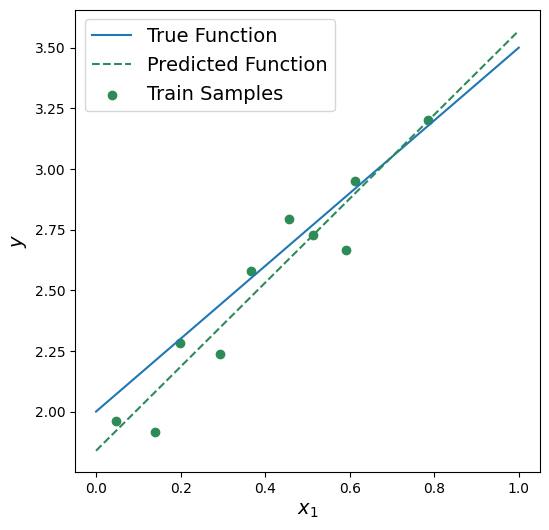

In [15]:
visualize_results(x1_train, y_train, w_pred, w_true)